AI21BTECH11023-Pranav Balasubramanian


CNN

In [2]:
import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from sklearn.decomposition import PCA

In [3]:
#functions to be used
def displayimg(X):
    plt.imshow(X)
  
def sigmoid(x):
    return 1/(1+np.exp(-x))

def RELU(x):
    return x * (x > 0)

def PRELU(x):
   return 0.01*x*(x<0)+x*(x>0)

In [4]:
def vecf(Y,nlf):
    if(nlf=='sigmoid'):
        Y=sigmoid(Y)
    if(nlf=='RELU'):
        Y=RELU(Y)
    if(nlf=='PRELU'):
        Y=PRELU(Y)
    return Y

In [5]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [6]:
#P1-convolution function
"""
args:
    X:input 3-D matrix
    kernel: kernel matrix with which X is convoluted
    stride: stride for convolution
    padding: padding of input matrix X
    nlf: the non linear activation applied at the end
    
    ->first X is padded with 0's using np.pad, then the extra zeros on top and bottom are removed by slicing
    ->output matrix(Y) is made ,whose size is derived from input parameters
    ->while the kernel does not go outside X(kernel's end crosses input X's end) we keep moving the kernel and convoluting it with the part of X it overlaps using
      np.multiply(across a fixed channel) which does element by element multiplication and takes sum of all the values obtained,this is done for all channels 
      and then accumulated
    ->keep moving by the input stride and when Y is filled we apply non-linearity to Y and return Y  
"""
def convolve(X,kernel,stride,padding,nlf):
    X=np.pad(X,padding,'constant',constant_values=0)
    if(padding !=0):
        X=X[:][:][padding:-padding]
    W=X.shape[0]
    H=X.shape[1]
    C=X.shape[2]
    #print(W,H,C)
    w=kernel.shape[0]
    h=kernel.shape[1]
    #print(w,h)
    Y=np.zeros([math.ceil((W-w+1)/stride),math.ceil((H-h+1)/stride)])
    i=0
    p=0
    q=0
    while(i+w<=W):
        j=0
        q=0
        while(j+h<=H):
            for c in range(C):
                Y[p][q]=np.sum(np.multiply(X[i:i+w,j:j+h,c],kernel[:,:,c]))+Y[p][q]
                # for m in range(w):
                #     for l in range(h):
                #         Y[p][q]+=X[c][i+m][j+l]*kernel[c][m][l]
            q+=1
            j+=stride
        i+=stride
        p+=1
    Y=vecf(Y,nlf)
    Y=np.array(Y)
    return Y

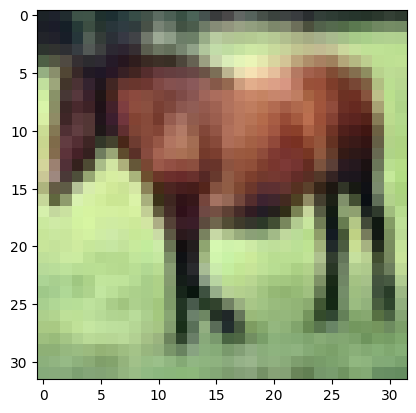

[[[0.6394152  0.18847821 0.96274268]
  [0.42987096 0.6174123  0.16626205]
  [0.39875091 0.0723114  0.30270818]]

 [[0.29890999 0.33494456 0.78329919]
  [0.12775015 0.34638722 0.41021348]
  [0.94194398 0.97020462 0.99380866]]

 [[0.68516883 0.62829303 0.51000548]
  [0.04201506 0.49998037 0.71969323]
  [0.87960538 0.02990354 0.95147846]]]


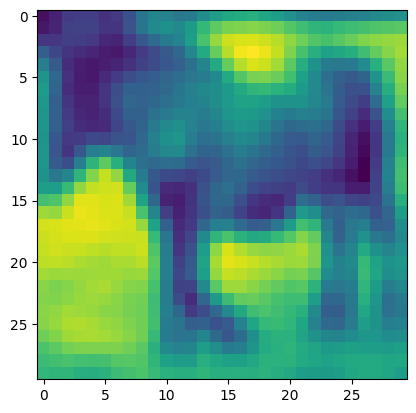

In [7]:
"""
The code below first displayes the image chosen, then genrates a random kernel with
same number of channels as the image(3 here) then does convolution using the code above and finally displays the image after convolution
"""
displayimg(X_train[7])
plt.show()
kernel=np.random.rand(3,3,3)
print(kernel)
timg=convolve(X_train[7],kernel,1,0,'RELU')
#print(timg)
displayimg(timg)
plt.show()

In [8]:
#P2-Pooling Function
"""
args:
    X:input 2-D matrix
    pfunc: pooling function to be used
    size: over what (size*size) part pfunc is used
    stride: input stride
The above code is very similar to the convolution function.The differences are
->input is 2-D
->The output size
->instead of convolution with kernel over the kernel size we apply pooling function over the (size*size) part 
"""
def pooling(X,pfunc,size,stride):
    W=X.shape[0]
    H=X.shape[1]
    Y=np.zeros([math.ceil((W-size+1)/stride),math.ceil((H-size+1)/stride)])
    i=0
    p=0
    k=size
    while(i+k<=W):
        j=0
        q=0
        while(j+k<=H):
            if(pfunc=='MAX'):
                Y[p][q]=np.amax(X[i:i+k,j:j+k])
            if(pfunc=='AVG'):
                Y[p][q]=np.mean(X[i:i+k,j:j+k])
            q+=1
            j+=stride
        i+=stride
        p+=1
    Y=np.array(Y)
    return Y

In [27]:
"""
The below code demonstrates an example of the pooling function made
"""
testmat=np.random.rand(4,4)
print(testmat)
tp=pooling(testmat,'MAX',2,2)
print(tp)
"""
testing with image
"""
print(X_train[0][:,:,0].shape)
pooling(X_train[0][:,:,0],'MAX',2,2).shape


[[0.39423747 0.19586418 0.92600643 0.9634503 ]
 [0.36210424 0.24427387 0.65599132 0.25224808]
 [0.39866127 0.07761498 0.64590018 0.12118614]
 [0.5907197  0.89618585 0.45520993 0.12904648]]
[[0.39423747 0.9634503 ]
 [0.89618585 0.64590018]]
(32, 32)


(16, 16)

In [10]:
#P3-Convolution Layer function
"""
args:
    X:input 3-D matrix
    nof: number of kernels
    w,h,c: width,height and channels of the kernel
    stride: input stride
    padding: input padding
    nlf: non-linearity applied at the end
->computes convolution between X and each of the kernels(randomly generated) using 
  convolution function written above and adds biases to output and then applies non-linearity.Finally returns all the outputs and kernels used
"""
def convlayerfunc(X,nof,w,h,c,stride,padding,nlf):
    Y=[]
    kernels=[]
    for k in range(nof): 
        d=np.random.rand(w,h,c)
        Z=convolve(X,d,stride,padding,nlf) 
        Y.append(Z+np.random.rand(Z.shape[0],Z.shape[1]))
        kernels.append(d)
    Y=np.array(Y)
    return [Y,kernels]

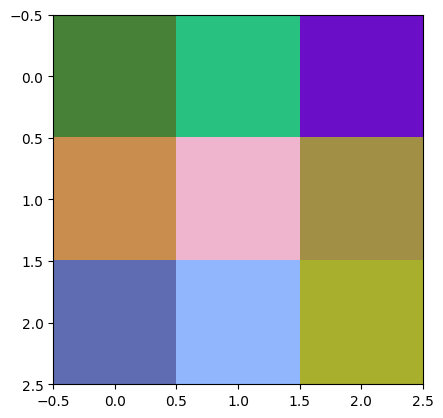

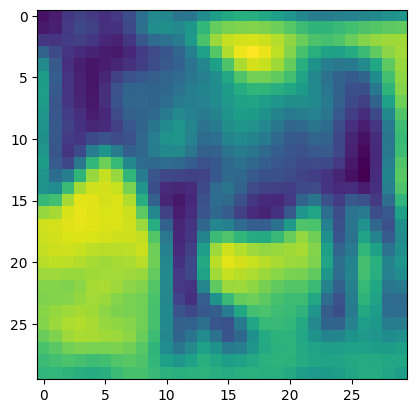

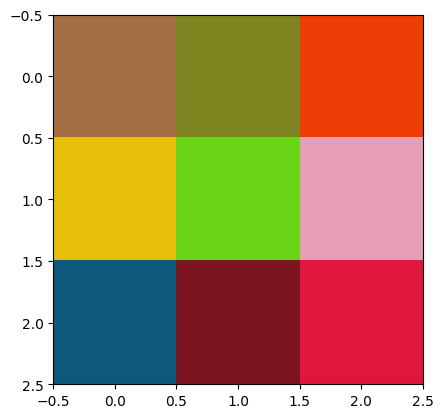

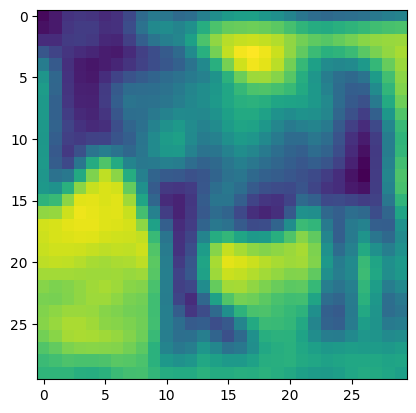

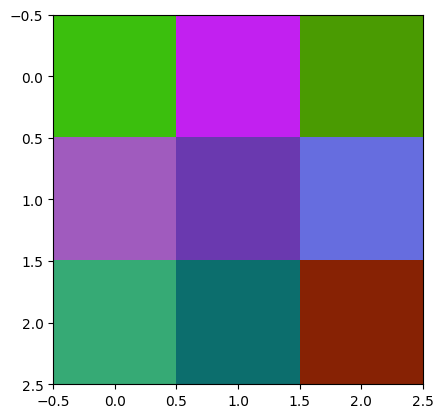

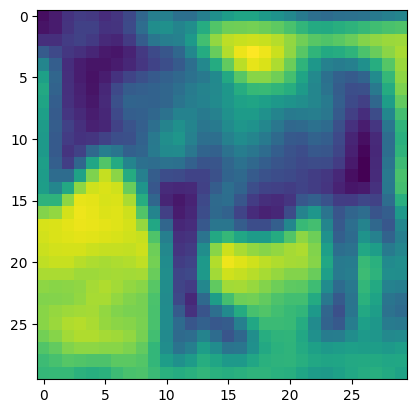

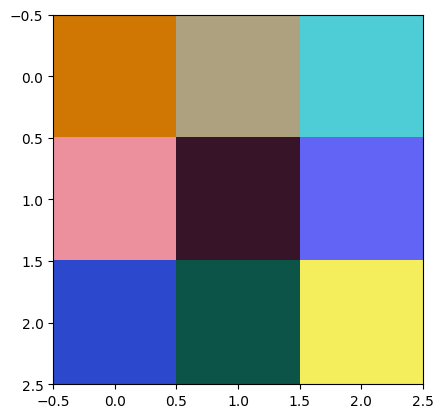

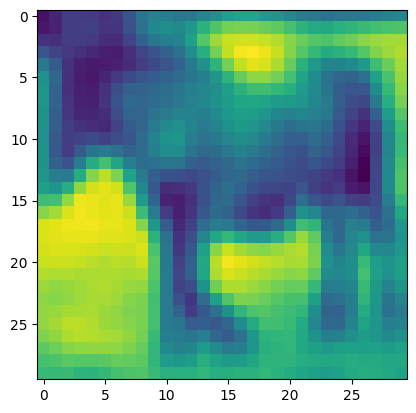

(4, 30, 30)

In [66]:
"""
Displaying the kernels and output of the convolutionlayer function
"""
Z=convlayerfunc(X_train[7],4,3,3,3,1,0,'PRELU')
for i in range(len(Z[1])):
  displayimg(Z[1][i])
  plt.show()
  displayimg(Z[0][i])
  plt.show()
Z[0].shape

In [12]:
#P4-Pooling Layer Function
"""
args:
    X:input 3-D matrix
    pfunc: pooling function to be used
    size: over what (size*size) part pooling function is used
    stride: input stride

Applies pooling function made above on each channel of X and outputs all the outputs
"""
def poolinglayerfunc(X,pfunc,size,stride):
    Y=[]
    if(pfunc != 'GAP'):
        for k in range(X.shape[2]):
            Y.append(pooling(X[:,:,k],pfunc,size,stride))
    else:
        for k in range(X.shape[2]):
            Y.append(np.mean(X[:,:,k]))
    Y=np.array(Y)
    return Y

In [13]:
testmat=np.array([[[1,2,9],[3,4,5],[6,7,8]],[[1,2,9],[3,4,5],[6,7,8]]])
print(testmat)
S=poolinglayerfunc(testmat,'MAX',2,1)
print(S)

[[[1 2 9]
  [3 4 5]
  [6 7 8]]

 [[1 2 9]
  [3 4 5]
  [6 7 8]]]
[[[3. 6.]]

 [[4. 7.]]

 [[9. 8.]]]


In [14]:
#P5-Flattening function
"""
args:
    X:input 3-D matrix
    vec_size:desired length of output vector
->Assume X has dimensions (w*h*c) and required vector length=vec_size , first each value of X is appended in
  a list Y(1*n) then Y.T(n*1) is premultiplied by a weight matrix(randomly generated) of dimensions(vec_size*n) to get an output 
  vector of size (vec_size *1) 
"""
def Flattening(X,vec_size):
    Y=[]
    for c in range(X.shape[2]):
        for w in range(X.shape[1]):
            for h in range(X.shape[0]):
                Y.append(X[h][w][c])
    
    Y=np.array(Y)
    W=np.random.rand(vec_size,X.shape[0]*X.shape[1]*X.shape[2])
    
    return np.dot(W,Y.T)

In [15]:
ft=np.zeros(shape=[100,100,2])
#number of elements=100*100*2=20000
flatft=Flattening(ft,10000)
flatft1=Flattening(ft,ft.shape[0]*ft.shape[1]*ft.shape[2])
print(flatft.shape)
print(flatft1.shape)

(10000,)
(20000,)


In [16]:
#P6-MLP
def MLP(input,nohidden,sizes,nlf,output_size,softmax):
    #assuming input is n*1
    weights=[]
    weights.append(np.random.rand(input.shape[0],sizes[0]))

    for i in range(nohidden-1):
        weights.append(np.random.rand(sizes[i],sizes[i+1]))
    
    weights.append(np.random.rand(sizes[nohidden-1],output_size))
    Y=np.dot(input.T,weights[0])
    Y=Y+np.random.rand(Y.shape[0])

    for i in range(len(sizes)):
        Y=vecf(Y,nlf)
        Y=np.dot(Y,weights[i+1])
        Y=Y+np.random.rand(Y.shape[0])
    
    if(softmax==True):
        Z=np.exp(Y)
        sum=np.sum(Z)
        Z=Z/sum
        return Z
    else:
        Y=vecf(Y,nlf)
        Y=np.array(Y)
        return Y

In [17]:
#Feed-forward path
"""
noc: number of output parameters
forwardpass: This function takes as input an image and passes it through a CNN which outputs a vector of length noc
fpassflattened: This function takes input an image and passes it through a CNN till the GAP layer
"""
class CNN:
    def __init__(self,noc):
        self.noc=noc
    def forwardpass(self,X):     
        Y=convlayerfunc(X,16,3,3,3,1,0,'sigmoid')[0]
        Y=poolinglayerfunc(Y,'MAX',2,2)
        Y=convlayerfunc(Y,8,3,3,16,1,0,'sigmoid')[0]
        Y=poolinglayerfunc(Y,'MAX',2,2)
        Y=poolinglayerfunc(Y,'GAP',2,2)
        Y=MLP(Y,1,[Y.shape[0]],'sigmoid',self.noc,True)
        return Y
    def fpassflattened(self,X):
        Y=convlayerfunc(X,16,3,3,3,1,0,'sigmoid')[0]
        Y=poolinglayerfunc(Y,'MAX',2,2)
        Y=convlayerfunc(Y,8,3,3,16,1,0,'sigmoid')[0]
        Y=poolinglayerfunc(Y,'MAX',2,2)
        Y=poolinglayerfunc(Y,'GAP',2,2)   
        return Y    

In [18]:
NN=CNN(10)
z=NN.forwardpass(X_train[0])
print(z)
z.shape

[0.12828067 0.01093389 0.02452824 0.44295781 0.09970708 0.00831539
 0.04274959 0.1130608  0.05519013 0.0742764 ]


(10,)

In [19]:
"""
Getting indexes of one image per class using np.where function
"""
c=[]
for i in range(10):
  t=np.where(y_train==i)
  c.append(t[0][0])
print(c)


[29, 4, 6, 9, 3, 27, 0, 7, 8, 1]


8 a) 

In [20]:
for classindex in c:
  z=NN.forwardpass(X_train[classindex])
  print(z)
"""
NO trend seen below
"""

[0.11604156 0.06466919 0.14254877 0.08205742 0.10115245 0.27481307
 0.06218705 0.01485151 0.07331014 0.06836883]
[0.09373827 0.01894562 0.07793953 0.27573733 0.05757349 0.18606344
 0.07738369 0.04501048 0.02369144 0.1439167 ]
[0.04343682 0.08812586 0.0432389  0.18301855 0.12784645 0.01150937
 0.01479475 0.17447742 0.09884035 0.21471152]
[0.048324   0.07392056 0.21803524 0.04348104 0.25231437 0.08155517
 0.02073462 0.02139972 0.18867746 0.0515578 ]
[0.10553443 0.01541285 0.03052205 0.09792233 0.63413568 0.00528993
 0.00289428 0.07520355 0.02136286 0.01172204]
[0.17311734 0.032395   0.362343   0.01477821 0.15926041 0.057883
 0.04980144 0.04042001 0.07450315 0.03549844]
[0.00731858 0.16974293 0.03756527 0.08736712 0.02725237 0.35976228
 0.05277994 0.22246463 0.02759336 0.00815352]
[0.09039466 0.0874356  0.04004413 0.11256596 0.03135614 0.40233598
 0.08512117 0.05741134 0.07252756 0.02080746]
[0.00619472 0.03560852 0.46839033 0.07040951 0.03749622 0.0083607
 0.22400826 0.09143792 0.0190069

'\nNO trend seen below\n'

In [21]:
d=[]
for i in range(10):
  t=np.where(y_train==i)
  d.append(t[0][:3])
print(d)

[array([29, 30, 35], dtype=int64), array([ 4,  5, 32], dtype=int64), array([ 6, 13, 18], dtype=int64), array([ 9, 17, 21], dtype=int64), array([ 3, 10, 20], dtype=int64), array([27, 40, 51], dtype=int64), array([ 0, 19, 22], dtype=int64), array([ 7, 11, 12], dtype=int64), array([ 8, 62, 69], dtype=int64), array([ 1,  2, 14], dtype=int64)]


In [22]:
"""
Passing each of the class images in the fpassflattened function to get GAP layer outputs for each image
"""
data=[]
labels=[]
for i in range(len(d)):
  for j in range(3):
    X = NN.fpassflattened(X_train[d[i][j]])
    data.append(X)
    labels.append(i)

8 b)

(30, 2) 30


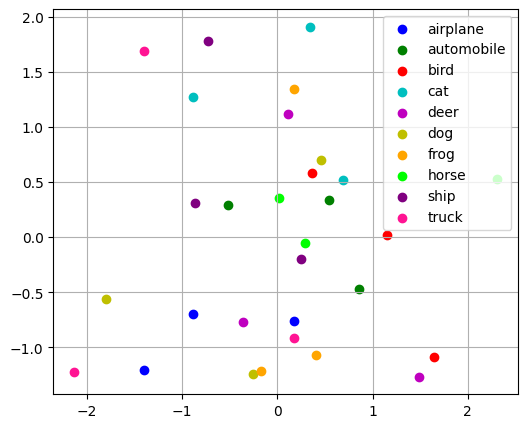

In [23]:
"""
Using in built PCA function to represent Images(output of GAP layer) in 2-D
"""
labels=np.array(labels)
pca = PCA(n_components=2, whiten=True)
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
pca.fit(data)
X_pca = pca.transform(data)
print(X_pca.shape,len(labels))
target_ids = range(len(labels))
plt.figure(figsize=(6, 5))
colors=['b','g','r','c','m','y','orange','lime','purple','deeppink']
for i, c, label in zip(target_ids, colors,classes):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1],
               c=colors[i], label=label)
plt.legend()
plt.grid()
plt.show()